# Key Indicators of Heart Disease
### 2020 annual CDC survey data of 400k adults related to their health status

[URL: Key Indicators of Heart Disease ](https://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heart-disease/version/2)

#### 1. What topic does the dataset cover?
According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.
#### 2. Where did the dataset come from and what treatments did it undergo?
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. 


### Questions 
- **Q1. Do people of different races have a significant difference in the probability of having heart disease at different ages?**
- **Q2. What's the difference of health status between people with and without heart disease？**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
heart = pd.read_csv('heart_2020_cleaned.csv')
heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [34]:
heart.describe(include = "all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,NaN,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,NaN,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,NaN,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,0.085595,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,0.279766,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,0.000000,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,0.000000,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,0.000000,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,0.000000,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [ ]:
heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Q1. Classify people with heart disease of different races in all age categories
- We know that the white race obviously has a lager number of people with  heart disease than other races from the data from 2020.
- We know the risk for heart disease increases with age, especially for those who are over 60. 

In [ ]:
# Check the list of the Races.

heart['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [ ]:
# Check the list of the Races and AgeCategory.

heart['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
# Change the categorical values (Yes/No) of "HeartDisease" to numerical (1/0) values. 

heart_c = heart.select_dtypes(include="object")

heart["HeartDisease"] = heart["HeartDisease"].replace({"No": 0, "Yes": 1})
heart["HeartDisease"].unique()

array([0, 1])

In [ ]:
# Make a pivot table to show the count in each age category of each race.

heart_d = heart.pivot_table(values="HeartDisease", index = 'AgeCategory', columns="Race", aggfunc = 'sum')
heart_d

Race,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
AgeCategory,,,,,,
18-24,2,7,11,31,7,72
25-29,4,3,11,31,11,73
30-34,12,9,23,24,20,138
35-39,7,7,23,49,13,197
40-44,10,8,55,62,40,311
45-49,36,9,75,107,36,481
50-54,43,23,148,139,68,962
55-59,64,29,166,177,113,1653
60-64,70,37,287,210,122,2601


In [ ]:
sumByRace = heart.groupby('Race').HeartDisease.agg(sum)

sumByRace

Race
American Indian/Alaskan Native      542
Asian                               266
Black                              1729
Hispanic                           1443
Other                               886
White                             22507
Name: HeartDisease, dtype: int64

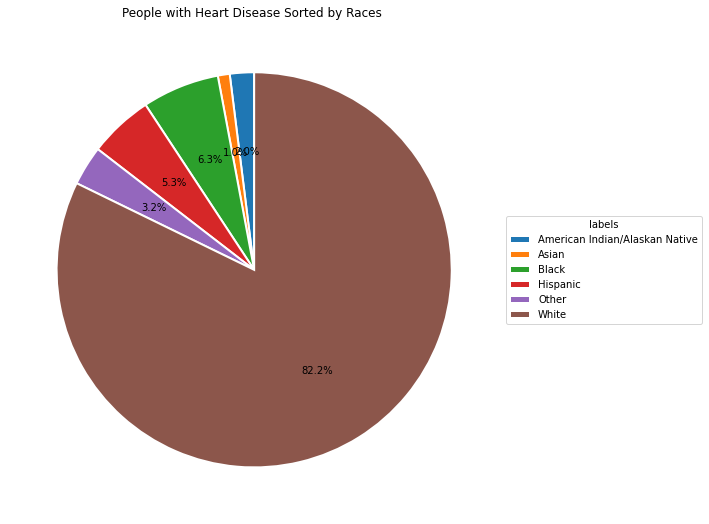

In [32]:
plt.style.use('_mpl-gallery-nogrid')

labels = sorted(heart['Race'].unique())
values = sumByRace

fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(values, autopct = '%1.1f%%', 
       startangle = 90, wedgeprops={"linewidth": 2, "edgecolor": "white"})

ax.legend(wedges, labels, title = 'labels', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
ax.set_title("People with Heart Disease Sorted by Races ")
plt.show()


<AxesSubplot:xlabel='AgeCategory'>

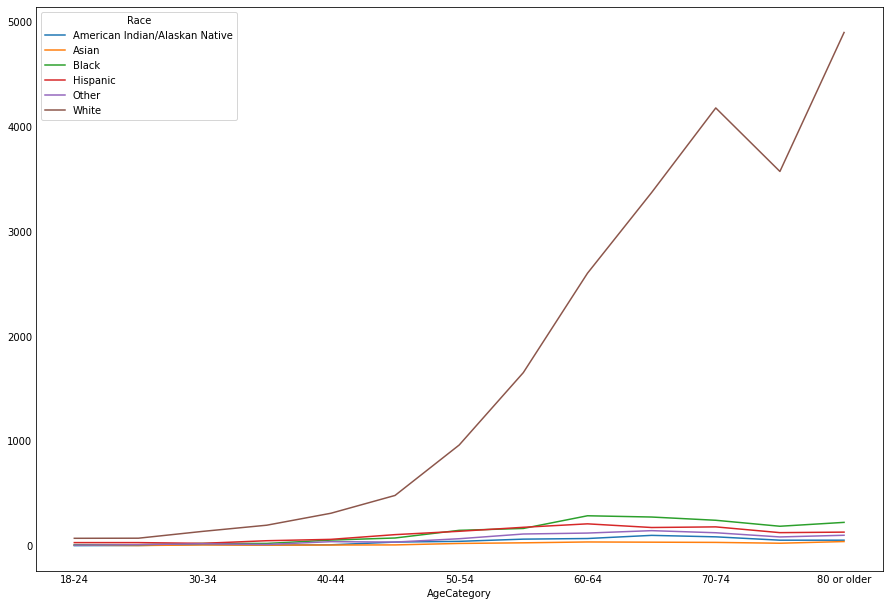

In [33]:
heart_d.plot(figsize=(12,8))

# Q2. The key indicators between people with and without heart disease
- People with heart disease have higher BMI than people without heart disease on average.
- People with heart disease didn't feel well in physical health about 8 days per month, while people without heart disease only felt unwell about about 3 days.
- People with heart disease didn't feel well in mental health about 4 days per month, while people without heart disease only felt unwell about about 3 days.

In [36]:
hm = heart.groupby("HeartDisease").mean()
hm

,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,,,,
0,28.224658,2.956416,3.828778,7.093416
1,29.401592,7.808242,4.641764,7.136156


In [59]:
# convert the dataframe to lists 
mean = hm.values.tolist()
mean

[[28.22465833624009, 2.956415727954805, 3.8287782724965975, 7.093416364021858],
 [29.401592079786653, 7.8082416980236, 4.64176378182881, 7.136156066196617]]

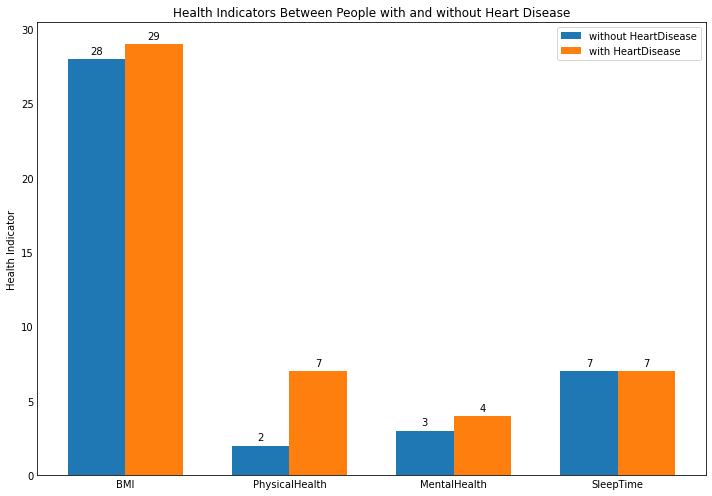

In [69]:
labels = hm.columns
x = np.arange(len(labels))  
width = 0.35  

# convert all the float numbers to integers 
withH = [int(x) for x in mean[1]]
withOutH = [int(x) for x in mean[0]]

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, withOutH, width, label='without HeartDisease')
rects2 = ax.bar(x + width/2, withH, width, label='with HeartDisease')

ax.set_ylabel('Health Indicator')
ax.set_title('Health Indicators Between People with and without Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()